![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [50]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# read data of women's international football matches
soccer_women = pd.read_csv('women_results.csv')
# select FIFA World Cup matches (not including qualifiers) since 2002-01-01.
soccer_women_2002 = soccer_women[(soccer_women['date'] >= '2002-01-01') & (soccer_women['tournament'] == 'FIFA World Cup')]
# calculating total score
soccer_women_2002['total_score'] = soccer_women_2002['home_score'] + soccer_women_2002['away_score']
# add new column for women
soccer_women_2002['group'] = 'women'


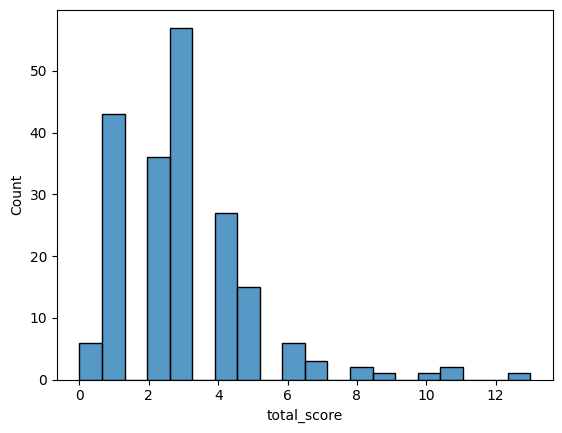

In [51]:
# draw histgram to determine normality
sns.histplot(x='total_score', data=soccer_women_2002)
plt.show()


In [52]:
# read data of en's international football matches
soccer_men = pd.read_csv('men_results.csv')
# select FIFA World Cup matches (not including qualifiers) since 2002-01-01.
soccer_men_2002 = soccer_men[(soccer_men['date'] >= '2002-01-01') & (soccer_men['tournament'] == 'FIFA World Cup')]
# calculating total score
soccer_men_2002['total_score'] = soccer_men_2002['home_score'] + soccer_men_2002['away_score']
# add new column for men
soccer_men_2002['group'] = 'men'

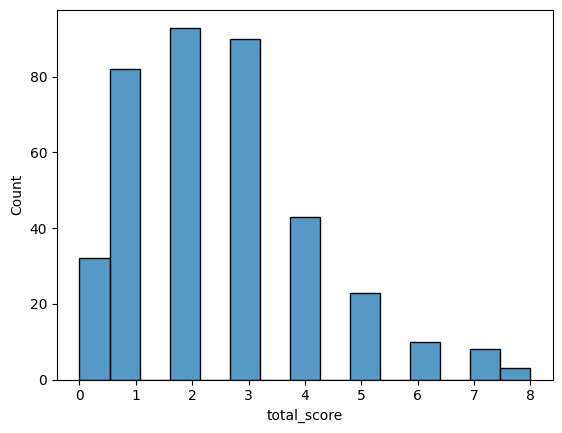

In [53]:
# draw histgram to determine normality
sns.histplot(x='total_score', data=soccer_men_2002)
plt.show()

In [54]:
# combine two tables
men_women = pd.concat([soccer_men_2002, soccer_women_2002])
men_women_part =men_women[['total_score', 'group']]
#transform to wide table
men_women_part_pivtable = men_women_part.pivot(columns='group', values='total_score')
men_women_part_pivtable

group,men,women
1600,NaN,3.0
1601,NaN,2.0
1602,NaN,5.0
1603,NaN,6.0
1604,NaN,4.0
...,...,...
44343,3.0,NaN
44345,3.0,NaN
44346,2.0,NaN
44350,3.0,NaN


In [55]:
#perform hypothesis test 
import pingouin
mwu_test = pingouin.mwu(x=men_women_part_pivtable['women'], y=men_women_part_pivtable['men'], alternative='greater')

In [56]:
# calculating p-value
p_value = mwu_test['p-val'][0]
p_value

0.005106609825443641

In [57]:
# calculating the result of the test
if p_value <= 0.01:
    result = 'reject'
else:
    result = 'fail to reject'

In [58]:
# store the p-value and the result of the test in a dictionary called result_dict
result_dict = {'p_val': p_value, 'result': result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}